# Import libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

# To use datetime
from datetime import datetime

# For clustering location
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


# Import data

In [2]:
raw_data = pd.read_csv('kc_house_data.csv', 
                       dtype = {'price': int})
data = raw_data.copy()
data.date = pd.to_datetime(raw_data.date)

# Quick Look

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


# Split the data

In [5]:
train_set, test_set = train_test_split(data, test_size = 0.15, random_state = 42) 
train_set.shape

(18371, 21)

# Data Preprocessing

In [6]:
df = train_set.copy()

## Date

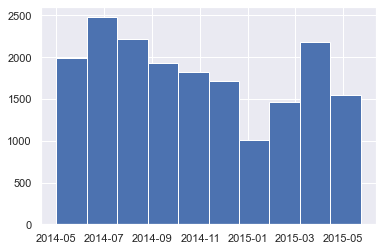

In [7]:
plt.hist(df.date)
plt.show()

In [8]:
df.date.median()

Timestamp('2014-10-16 00:00:00')

In [9]:
def dummy_date(df):
    # reset index in case needed
    df_dummied = df.reset_index(drop = True)

    # setting datetime split
    split_date = datetime(2014,10,16)
    
    # creating new column
    df_dummied.loc[:, 'recent_sells'] = 0
    
        
    for i in range(len(df_dummied)):
        if df_dummied.loc[i, 'date'] > split_date:
            df_dummied.loc[i, 'recent_sells'] = 1
    
    df_dummied.drop(['date'], axis = 1, inplace = True)
    
    print('Date function was applied:')
    print('--> It dummified old feature "date" and created new feature "recent_sells"\n')
    
    
    return df_dummied

In [10]:
df1 = dummy_date(df)
df1.head()

Date function was applied:
--> It dummified old feature "date" and created new feature "recent_sells"



,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,recent_sells
0,7739100155,750000,5,1.75,2850,11860,1.00,0,0,3,9,2850,0,1951,0,98155,47.75,-122.28,2640,11604,0
1,6099400053,145000,3,1.00,1010,5490,1.00,0,0,3,6,1010,0,1954,0,98168,47.48,-122.29,1740,10658,0
2,7468900270,140000,3,1.00,1090,10114,1.00,0,0,4,7,1090,0,1955,0,98002,47.30,-122.22,1380,7800,0
3,396100025,339999,4,2.00,1740,6369,1.00,0,0,5,6,870,870,1954,0,98133,47.75,-122.33,1560,7200,0
4,1160000255,311000,3,1.00,1120,8631,1.00,0,0,3,7,1120,0,1942,0,98125,47.71,-122.31,1350,7714,0


## Cleaning Bedrooms
It can seen from before that:
* max number of bedrooms is 33,
* min number of bedrooms is 0,

These numbers do not seem representative 

In [11]:
df1[(df1['bedrooms'] > 10) | (df1['bedrooms']  == 0)]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,recent_sells
367,2569500210,339950,0,2.50,2290,8319,2.00,0,0,3,8,2290,0,1985,0,98042,47.35,-122.15,2500,8751,1
2182,3918400017,380000,0,0.00,1470,979,3.00,0,2,3,8,1470,0,2006,0,98133,47.71,-122.36,1470,1399,1
3167,1453602309,288000,0,1.50,1430,1650,3.00,0,0,3,7,1430,0,1999,0,98125,47.72,-122.29,1430,1650,0
5355,2402100895,640000,33,1.75,1620,6000,1.00,0,0,5,7,1040,580,1947,0,98103,47.69,-122.33,1330,4700,0
6044,2954400190,1295650,0,0.00,4810,28008,2.00,0,0,3,12,4810,0,1990,0,98053,47.66,-122.07,4740,35061,0
6825,3980300371,142000,0,0.00,290,20875,1.00,0,0,1,1,290,0,1963,0,98024,47.53,-121.89,1620,22850,0
6832,2310060040,240000,0,2.50,1810,5669,2.00,0,0,3,7,1810,0,2003,0,98038,47.35,-122.05,1810,5685,0
10747,6896300380,228000,0,1.00,390,5900,1.00,0,0,2,4,390,0,1953,0,98118,47.53,-122.26,2170,6000,0
12491,7849202299,320000,0,2.50,1490,7111,2.00,0,0,3,7,1490,0,1999,0,98065,47.53,-121.83,1500,4675,1
18361,9543000205,139950,0,0.00,844,4269,1.00,0,0,4,7,844,0,1913,0,98001,47.28,-122.25,1380,9600,1


In [12]:
# To remove clear outliers & dummify variable
def clean_bedrooms(df):
    df.reset_index(inplace = True, drop = True)
    bed_clear_outliers = df[(df['bedrooms'] > 10) | (df['bedrooms']  == 0)]
    
    df_cleaned = df.drop(bed_clear_outliers.index)
    df_cleaned.reset_index(inplace = True, drop = True)
    
    df_cleaned.loc[:, 'beds_4more'] = 0
    
    for i in range(len(df_cleaned)):
        if df_cleaned.loc[i, 'bedrooms'] > 3:
            df_cleaned.loc[i, 'beds_4more'] = 1 # Houses with 1 to 3 bedrooms become the reference
    
    df_cleaned.drop(['bedrooms'], axis = 1, inplace = True)
    
    print('Bedroom function was applied:')
    print(f'--> {len(bed_clear_outliers)} outliers were removed')
    print('--> It dummified old feature "bedrooms" and created new feature "beds_4more"\n')
    
    
    return df_cleaned

In [13]:
df2 = clean_bedrooms(df1)
df2.head()

Bedroom function was applied:
--> 10 outliers were removed
--> It dummified old feature "bedrooms" and created new feature "beds_4more"



,id,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,recent_sells,beds_4more
0,7739100155,750000,1.75,2850,11860,1.00,0,0,3,9,2850,0,1951,0,98155,47.75,-122.28,2640,11604,0,1
1,6099400053,145000,1.00,1010,5490,1.00,0,0,3,6,1010,0,1954,0,98168,47.48,-122.29,1740,10658,0,0
2,7468900270,140000,1.00,1090,10114,1.00,0,0,4,7,1090,0,1955,0,98002,47.30,-122.22,1380,7800,0,0
3,396100025,339999,2.00,1740,6369,1.00,0,0,5,6,870,870,1954,0,98133,47.75,-122.33,1560,7200,0,1
4,1160000255,311000,1.00,1120,8631,1.00,0,0,3,7,1120,0,1942,0,98125,47.71,-122.31,1350,7714,0,0


## sqft_basement

In [14]:
df2.sqft_basement.value_counts()

0       11185
600       192
700       186
500       176
800       174
        ...  
2600        1
2360        1
2120        1
1880        1
1135        1
Name: sqft_basement, Length: 295, dtype: int64

In [15]:
def clear_basement(df):
    df.reset_index(inplace = True, drop = True)
    
    df['has_basement'] = 0
    
    for i in range(len(df)):
        if df.loc[i, 'sqft_basement'] > 0:
            df.loc[i, 'has_basement'] = 1
    
    df_cleaned = df.drop(['sqft_basement'], axis = 1)
    
    print('Basement function was applied:')
    print(f'--> "sqft_basement" feature was dummified into "has_basement"\n')
    
    return df_cleaned

In [16]:
df3 = clear_basement(df2)
df3.head()

Basement function was applied:
--> "sqft_basement" feature was dummified into "has_basement"



,id,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,recent_sells,beds_4more,has_basement
0,7739100155,750000,1.75,2850,11860,1.00,0,0,3,9,2850,1951,0,98155,47.75,-122.28,2640,11604,0,1,0
1,6099400053,145000,1.00,1010,5490,1.00,0,0,3,6,1010,1954,0,98168,47.48,-122.29,1740,10658,0,0,0
2,7468900270,140000,1.00,1090,10114,1.00,0,0,4,7,1090,1955,0,98002,47.30,-122.22,1380,7800,0,0,0
3,396100025,339999,2.00,1740,6369,1.00,0,0,5,6,870,1954,0,98133,47.75,-122.33,1560,7200,0,1,1
4,1160000255,311000,1.00,1120,8631,1.00,0,0,3,7,1120,1942,0,98125,47.71,-122.31,1350,7714,0,0,0


## Exploring features

In [17]:
max_same_value = []
name = []

for attribute in df3.columns:
    count = df3[attribute].value_counts().head(1).to_frame().iloc[0][0]
    
    if count > 1:
        max_same_value.append(count)
        name.append(attribute)
    
pd.DataFrame(
{
    'attribute': name,
    'max_same_values':max_same_value
})

# => this means that some IDs appear 2 times in the data; there are up to 123 houses sold in one day; 
#...there are 143 houses that were sold at the same price, etc.

,attribute,max_same_values
0,id,2
1,price,149
2,bathrooms,4597
3,sqft_living,115
4,sqft_lot,313
5,floors,9035
6,waterfront,18223
7,view,16548
8,condition,11929
9,grade,7652


## Highly imbalanced features 

In [18]:
for column in df3.columns:
    print(column, len(df3[df3[column] > 0])/len(df3))

id 1.0
price 1.0
bathrooms 0.9998366102064158
sqft_living 1.0
sqft_lot 1.0
floors 1.0
waterfront 0.007515930504874462
view 0.09874189858940145
condition 1.0
grade 1.0
sqft_above 1.0
yr_built 1.0
yr_renovated 0.04122869124775339
zipcode 1.0
lat 1.0
long 0.0
sqft_living15 1.0
sqft_lot15 1.0
recent_sells 0.49686836228963566
beds_4more 0.40782092478623166
has_basement 0.39082838625347205


In [19]:
# Remove all features having less than 10% of positive values

def remove_highly_imbalanced_features(df):
    to_drop = []
    for column in df.columns:
        if len(df[df[column] > 0]) > 0:
            if len(df[df[column] > 0])/len(df) < 0.1:
                to_drop.append(column)
            
    df_removed = df.drop(to_drop, axis = 1)
    
    print('Remove imbalance features function was applied:')
    print(f'--> The following features were dropped: {to_drop}\n')

    return df_removed

In [20]:
df4 = remove_highly_imbalanced_features(df3)
df4.head()

Remove imbalance features function was applied:
--> The following features were dropped: ['waterfront', 'view', 'yr_renovated']



,id,price,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,recent_sells,beds_4more,has_basement
0,7739100155,750000,1.75,2850,11860,1.00,3,9,2850,1951,98155,47.75,-122.28,2640,11604,0,1,0
1,6099400053,145000,1.00,1010,5490,1.00,3,6,1010,1954,98168,47.48,-122.29,1740,10658,0,0,0
2,7468900270,140000,1.00,1090,10114,1.00,4,7,1090,1955,98002,47.30,-122.22,1380,7800,0,0,0
3,396100025,339999,2.00,1740,6369,1.00,5,6,870,1954,98133,47.75,-122.33,1560,7200,0,1,1
4,1160000255,311000,1.00,1120,8631,1.00,3,7,1120,1942,98125,47.71,-122.31,1350,7714,0,0,0


## Dealing with outliers

The class _Outliers_ allows us to find outliers following the IQR rule for outliers, telling us how many outliers are for each attribute. Then it can return a dataframe with all the found outliers (_show_) AND/OR a copy of our dataset without the outliers (_remove_).

Finally, it can also find & remove them at once (by using _find_remove_)

In [21]:
class Outliers():
    def __init__(self):
        return None
    
    def find(self, df, att):
        self.df_ = df
        
        q1, q3 = df[att].quantile([0.25,0.75])
        iqr = q3 - q1
        cst = iqr*1.5
        
        # Rule:
        high_out = q3 + cst
        low_out = q1 - cst
        
        # Outliers:
        self.df_remove = df[(df[att] > high_out)|(df[att] < low_out)]
        
        count_out = len(self.df_remove)
        ratio_out = len(self.df_remove)/len(df)

        if count_out > 0:
            print('There are {} outliers found for the attribute {}.\n-->This represent {:.2%} of the entire set\n'.format(count_out, att, ratio_out))
        
      
    def show(self):
        return self.df_remove
                
    def remove(self):
        return self.df_.drop(self.df_remove.index)
    
    def find_remove(self, df, att):
        self.df_ = df
        
        q1, q3 = df[att].quantile([0.25,0.75])
        iqr = q3 - q1
        cst = iqr*1.5
        
        # Rule:
        high_out = q3 + cst
        low_out = q1 - cst
        
        # Outliers:
        self.df_remove = df[(df[att] > high_out)|(df[att] < low_out)]
        
        return df.drop(self.df_remove.index)

In [22]:
outliers = Outliers() 

In [23]:
for attribute in df4.columns:
    outliers.find(df4, attribute)

There are 978 outliers found for the attribute price.
-->This represent 5.33% of the entire set

There are 223 outliers found for the attribute bathrooms.
-->This represent 1.21% of the entire set

There are 500 outliers found for the attribute sqft_living.
-->This represent 2.72% of the entire set

There are 2045 outliers found for the attribute sqft_lot.
-->This represent 11.14% of the entire set

There are 28 outliers found for the attribute condition.
-->This represent 0.15% of the entire set

There are 1619 outliers found for the attribute grade.
-->This represent 8.82% of the entire set

There are 545 outliers found for the attribute sqft_above.
-->This represent 2.97% of the entire set

There are 2 outliers found for the attribute lat.
-->This represent 0.01% of the entire set

There are 208 outliers found for the attribute long.
-->This represent 1.13% of the entire set

There are 453 outliers found for the attribute sqft_living15.
-->This represent 2.47% of the entire set

The

In [24]:
def remove_all_outliers(df):
    df_org = len(df)
    
    att_to_remove = []
    for attribute in df.columns:
        if len(outliers.find_remove(df, attribute)) < len(df):
            if (attribute != 'lat') and (attribute != 'long'):
                att_to_remove.append(attribute)

    for att in att_to_remove:
        df = outliers.find_remove(df, att)
    
    df_rem = df.reset_index(drop = True)
    
    count_out = df_org - len(df)
    
    print('Remove all outliers function was applied:')
    print(f'--> {count_out} outliers were removed\n')
    
    return df_rem

In [25]:
df5 = remove_all_outliers(df4)
df5

Remove all outliers function was applied:
--> 4503 outliers were removed



,id,price,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,recent_sells,beds_4more,has_basement
0,7739100155,750000,1.75,2850,11860,1.00,3,9,2850,1951,98155,47.75,-122.28,2640,11604,0,1,0
1,6099400053,145000,1.00,1010,5490,1.00,3,6,1010,1954,98168,47.48,-122.29,1740,10658,0,0,0
2,7468900270,140000,1.00,1090,10114,1.00,4,7,1090,1955,98002,47.30,-122.22,1380,7800,0,0,0
3,396100025,339999,2.00,1740,6369,1.00,5,6,870,1954,98133,47.75,-122.33,1560,7200,0,1,1
4,1160000255,311000,1.00,1120,8631,1.00,3,7,1120,1942,98125,47.71,-122.31,1350,7714,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13853,7215721350,465000,2.50,1650,4636,2.00,3,8,1650,1999,98075,47.60,-122.02,1650,4504,1,0,0
13854,6600220380,538888,2.75,2080,13189,2.00,3,8,2080,1987,98074,47.63,-122.03,2030,11847,0,1,0
13855,5272200045,378000,1.50,1000,6914,1.00,3,7,1000,1947,98125,47.71,-122.32,1000,6947,1,0,0
13856,9578500790,399950,2.50,3087,5002,2.00,3,8,3087,2014,98023,47.30,-122.35,2927,5183,1,0,0


## Location

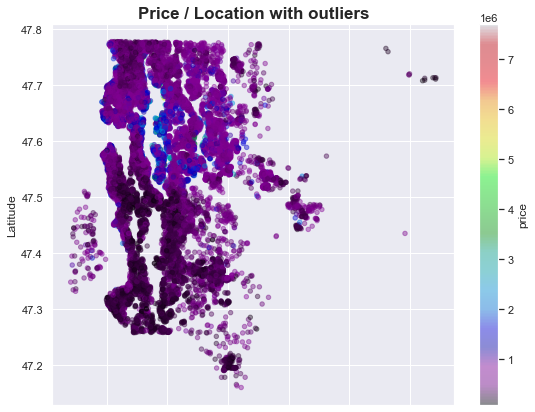

In [26]:
df4.plot(kind = 'scatter', x='long', y='lat', figsize = (9,7),
       alpha = 0.4, c = 'price', cmap = plt.get_cmap('nipy_spectral'), colorbar = True)
plt.ylabel('Latitude')
plt.xlabel('Longitude', weight = 'bold')
plt.title('Price / Location with outliers', weight = 'bold', size = 17)
plt.show()

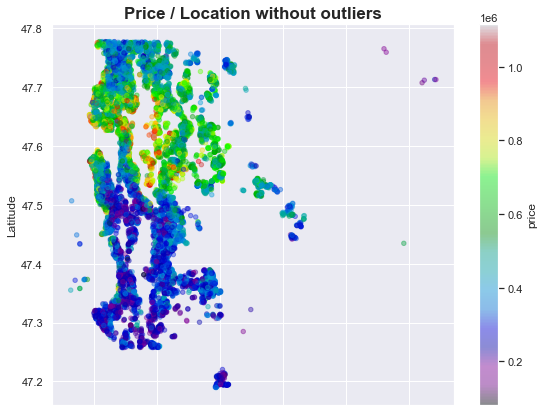

In [27]:
df5.plot(kind = 'scatter', x='long', y='lat', figsize = (9,7),
       alpha = 0.4, c = 'price', cmap = plt.get_cmap('nipy_spectral'), colorbar = True)
plt.ylabel('Latitude')
plt.xlabel('Longitude', weight = 'bold')
plt.title('Price / Location without outliers', weight = 'bold', size = 17)
plt.show()

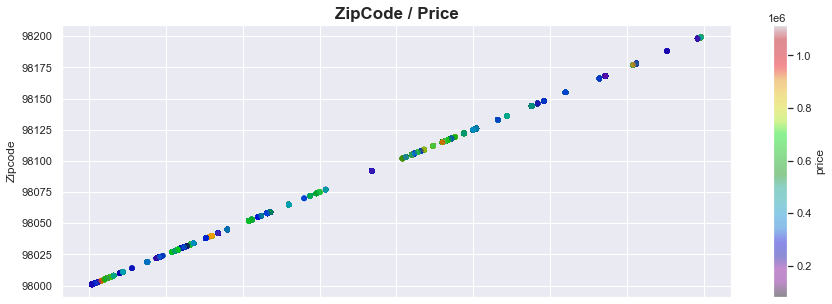

In [28]:
df5.plot(kind = 'scatter', x='zipcode', y='zipcode', figsize = (15,5),
       alpha = 0.4, c = 'price', cmap = plt.get_cmap('nipy_spectral'), colorbar = True)
plt.ylabel('Zipcode')
plt.xlabel('Zipcode', weight = 'bold')
plt.title('ZipCode / Price', weight = 'bold', size = 17)
plt.show()

### Hierarchical Clustering

In [29]:
df_test = df5.copy()
X_lat_long = df_test[['lat','long']].values

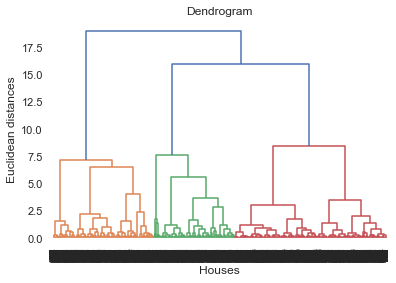

In [30]:
dendrogram = sch.dendrogram(sch.linkage(X_lat_long, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Houses')
plt.ylabel('Euclidean distances')
plt.show()

In [31]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_lat_long)

In [32]:
df_test['Location_cluster'] = y_hc

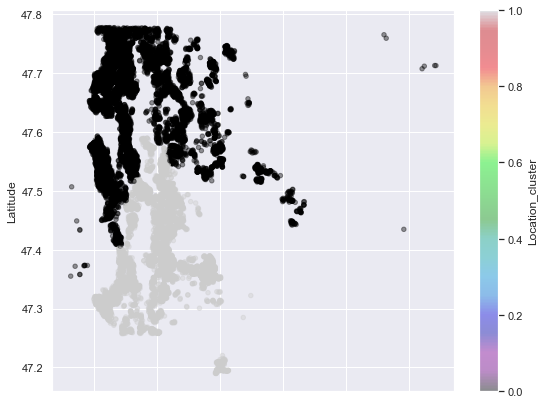

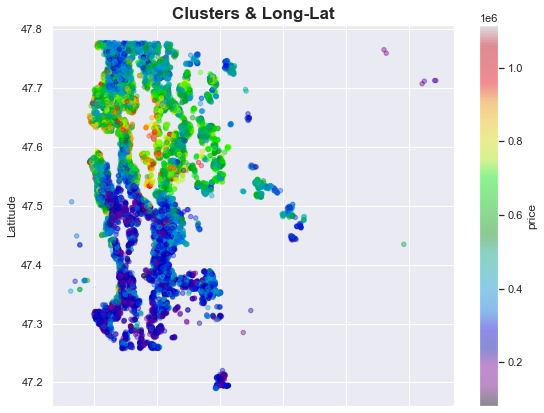

In [33]:
df_test.plot(kind = 'scatter', x='long', y='lat', figsize = (9,7),
       alpha = 0.4, c = 'Location_cluster', cmap = plt.get_cmap('nipy_spectral'), colorbar = True)
plt.ylabel('Latitude')

df_test.plot(kind = 'scatter', x='long', y='lat', figsize = (9,7),
       alpha = 0.4, c = 'price', cmap = plt.get_cmap('nipy_spectral'), colorbar = True)
plt.ylabel('Latitude')
plt.xlabel('Longitude', weight = 'bold')
plt.title('Clusters & Long-Lat', weight = 'bold', size = 17)
plt.show()

#### KMeans

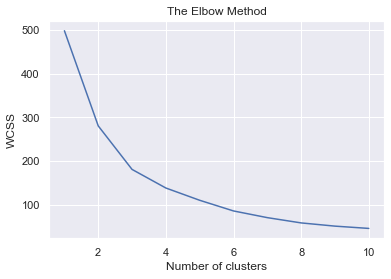

In [34]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_lat_long)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_lat_long)

In [36]:
df_test['Location_cluster'] = y_kmeans

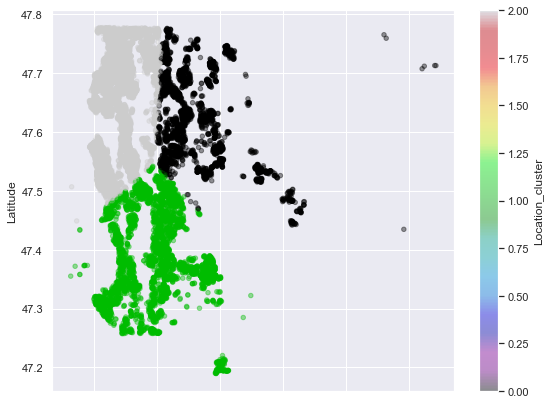

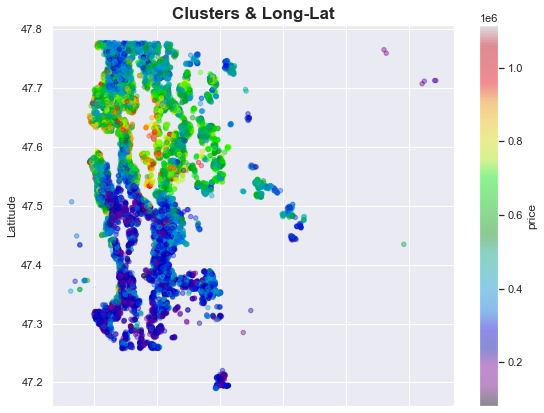

In [37]:
df_test.plot(kind = 'scatter', x='long', y='lat', figsize = (9,7),
       alpha = 0.4, c = 'Location_cluster', cmap = plt.get_cmap('nipy_spectral'), colorbar = True)
plt.ylabel('Latitude')

df_test.plot(kind = 'scatter', x='long', y='lat', figsize = (9,7),
       alpha = 0.4, c = 'price', cmap = plt.get_cmap('nipy_spectral'), colorbar = True)
plt.ylabel('Latitude')
plt.xlabel('Longitude', weight = 'bold')
plt.title('Clusters & Long-Lat', weight = 'bold', size = 17)
plt.show()

In [38]:
len(df_test[df_test['Location_cluster'] == 2])

6747

In [39]:
len(df_test[df_test['Location_cluster'] == 0])

2750

In [40]:
def cluster_long_lat(df):
    X_lat_long = df[['lat','long']].values
    kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
    y_kmeans = kmeans.fit_predict(X_lat_long)
    
    df['loc_north_west'] = 0
    df['loc_north_east'] = 0
    
    for i in range(len(df)):
        if y_kmeans[i] == 2:
            df.loc[i, 'loc_north_west'] = 1
        elif y_kmeans[i] == 0:
            df.loc[i, 'loc_north_east'] = 1
            
    df_clustered = df.drop(['lat','long', 'zipcode'], axis = 1)
    
    print('Kmeans cluster was applied to long & lat features:')
    print('--> Zipcode, lat, and long features were dropped and two new one-hot encoded features were created\n')
    
    return df_clustered

In [41]:
df6 = cluster_long_lat(df5)
df6.head()

Kmeans cluster was applied to long & lat features:
--> Zipcode, lat, and long features were dropped and two new one-hot encoded features were created



,id,price,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15,recent_sells,beds_4more,has_basement,loc_north_west,loc_north_east
0,7739100155,750000,1.75,2850,11860,1.00,3,9,2850,1951,2640,11604,0,1,0,1,0
1,6099400053,145000,1.00,1010,5490,1.00,3,6,1010,1954,1740,10658,0,0,0,0,0
2,7468900270,140000,1.00,1090,10114,1.00,4,7,1090,1955,1380,7800,0,0,0,0,0
3,396100025,339999,2.00,1740,6369,1.00,5,6,870,1954,1560,7200,0,1,1,1,0
4,1160000255,311000,1.00,1120,8631,1.00,3,7,1120,1942,1350,7714,0,0,0,1,0


In [42]:
df6.loc_north_west.sum()

6747

In [43]:
df6.loc_north_east.sum()

2750

## Further Exploration 

plt.figure(figsize = (16,10))
sns.heatmap(df6.corr(), vmin = -1, vmax = 1, cmap = 'PRGn')  
plt.show()

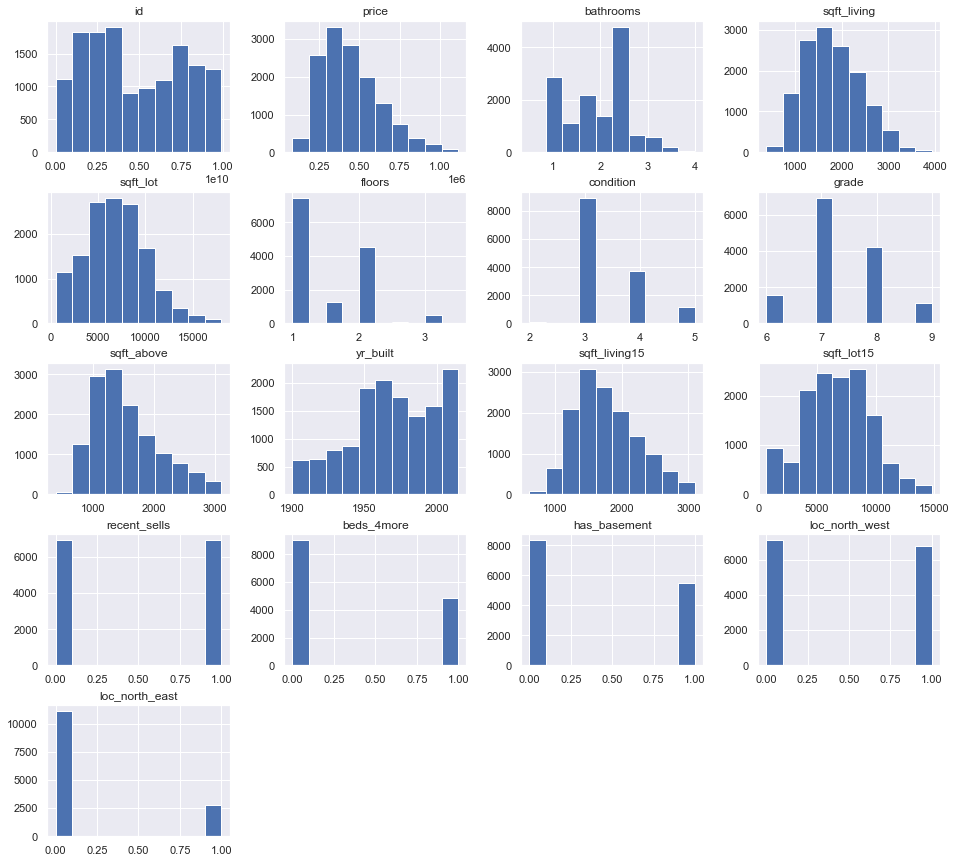

In [44]:
df6.hist(figsize = (16,15))
plt.show()

## ID

In [45]:
df6.id.value_counts().loc[lambda x : x>1]

1823049202    2
1250201165    2
937000330     2
8648900110    2
7409700215    2
             ..
1219000473    2
4302201085    2
705730280     2
1995200200    2
1446403850    2
Name: id, Length: 103, dtype: int64

In [46]:
df7 = df6.drop_duplicates('id', keep='last')
df7.shape

(13755, 17)